In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("alldata.csv")

In [3]:
df.head()

,A,B,C,D,E,F,G,H,I,J,RESULT
0,0,1,0,1,7,13000,0,10,1,34,0
1,1,0,0,0,7,19000,0,1,1,828,0
2,0,0,0,1,7,0,0,9,1,259,1
3,0,0,1,1,3,0,0,5,1,43259,0
4,0,0,0,1,7,10000,0,4,1,47,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29755 entries, 0 to 29754
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       29755 non-null  int64
 1   B       29755 non-null  int64
 2   C       29755 non-null  int64
 3   D       29755 non-null  int64
 4   E       29755 non-null  int64
 5   F       29755 non-null  int64
 6   G       29755 non-null  int64
 7   H       29755 non-null  int64
 8   I       29755 non-null  int64
 9   J       29755 non-null  int64
 10  RESULT  29755 non-null  int64
dtypes: int64(11)
memory usage: 2.5 MB


In [5]:
df.RESULT.value_counts()

0    29002
1      753
Name: RESULT, dtype: int64

In [6]:
import sklearn.linear_model as sklin

In [7]:
model = sklin.LogisticRegression()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RESULT',axis=1), df['RESULT'], test_size=0.33, random_state=42)

In [10]:
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
pred = model.predict(X_test)

In [12]:
np.mean(pred != y_test)

0.02525458248472505

In [13]:
import sklearn.metrics as skmet

In [14]:
skmet.confusion_matrix(y_test,pred)

array([[9572,    0],
       [ 248,    0]], dtype=int64)

In [15]:
len(df.query("RESULT == 1"))

753

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESULT', ylabel='count'>

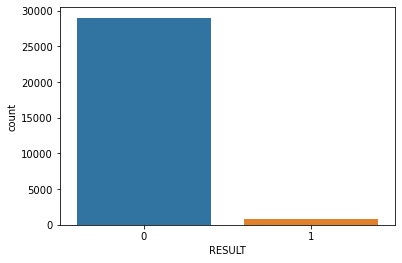

In [16]:
sb.countplot(df['RESULT'])

In [17]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9572
           1       0.00      0.00      0.00       248

    accuracy                           0.97      9820
   macro avg       0.49      0.50      0.49      9820
weighted avg       0.95      0.97      0.96      9820



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# METHHOD 1 - down sample the majority

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)

In [20]:
df2 = df_train[df_train['RESULT'] == 0]

In [21]:
df2[1:4]

,A,B,C,D,E,F,G,H,I,J,RESULT
22894,1,0,0,1,7,0,0,1,1,0,0
6490,0,0,0,1,3,0,0,1,0,43260,0
11361,0,0,1,1,7,0,0,12,1,43260,0


In [22]:
df3 = df_train[df_train['RESULT'] == 1]

In [23]:
df3.shape

(505, 11)

In [25]:
df4 = pd.concat([df2[:500],  df3,     df2[1001:1500],     df3])
df4.shape

(2009, 11)

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(df4.drop('RESULT',axis=1), df4['RESULT'], test_size=0.33, random_state=42)

In [27]:
X_train = df4.drop('RESULT',axis=1)
y_train = df4['RESULT']

In [28]:
sklin.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred = model.predict(X_test)

In [30]:
np.mean(pred != y_test)

0.39470468431771893

In [31]:
skmet.confusion_matrix(y_test,pred)

array([[5812, 3760],
       [ 116,  132]], dtype=int64)

In [32]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      9572
           1       0.03      0.53      0.06       248

    accuracy                           0.61      9820
   macro avg       0.51      0.57      0.41      9820
weighted avg       0.96      0.61      0.73      9820



In [33]:
# METHHOD 2 - RandomOverSampler

In [34]:
conda install imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - imbalanced-learn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [35]:
!pip install -U imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\sklearn\\~libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RESULT',axis=1), df['RESULT'], test_size=0.33, random_state=42)

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [43]:
import imblearn

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [39]:
X_ros.shape

NameError: name 'X_ros' is not defined

In [45]:
sum(y_ros==1)

19430

In [46]:
sum(y_ros==0)

19430

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)

In [48]:
model = sklin.LogisticRegression()
model.fit(X_ros,y_ros)

LogisticRegression()

In [49]:
pred = model.predict(X_test)

In [50]:
np.mean(pred != y_test)

0.4384747348721148

In [51]:
skmet.confusion_matrix(y_test,pred)

array([[3923, 2512],
       [3111, 3278]], dtype=int64)

In [52]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58      6435
           1       0.57      0.51      0.54      6389

    accuracy                           0.56     12824
   macro avg       0.56      0.56      0.56     12824
weighted avg       0.56      0.56      0.56     12824

